In [1]:
# import the stack smol
from datasets import load_dataset

ds_python = load_dataset('bigcode/the-stack-smol', data_dir="data/python", split="train")
ds_java = load_dataset('bigcode/the-stack-smol', data_dir="data/java", split="train")
ds_js = load_dataset('bigcode/the-stack-smol', data_dir="data/javascript", split="train")

Using custom data configuration bigcode--the-stack-smol-7b51f8bde3058781
Found cached dataset json (/Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--the-stack-smol-7b51f8bde3058781/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Using custom data configuration bigcode--the-stack-smol-95a2b7de57a7cb35
Found cached dataset json (/Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--the-stack-smol-95a2b7de57a7cb35/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Using custom data configuration bigcode--the-stack-smol-848a30ee7bac5c92
Found cached dataset json (/Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--the-stack-smol-848a30ee7bac5c92/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)


### Python

In [2]:
from text_extraction import get_text

example = """
#general comment
class foo():
    '''
    class docstring
    '''
    
    some_value = 2
    def bar(arg1, arg2):
        ''' function docstring'''
        if arg1 == 2:
            # first comment
            print(arg1)
        else:
            # second comment
            arg2 += 3
        return arg1 + arg2
"""

print(get_text(example))

class docstring
function docstring

general comment first comment second comment


In [79]:
# define the function to add a comments column to the dataset
COLUMN = "content"

def extract_nl_text(examples):
    text_list = []
    size_list = []
    ratio_list = []
    for code in examples[COLUMN]:
        text = get_text(code)
        text_list.append(text)
        size_list.append(len(text))
        ratio_list.append(len(text)/len(code))
    return {"nl_text": text_list, "nl_size": size_list, "nl_ratio": ratio_list}

In [146]:
ds = ds_python.select(range(2000))
ds = ds.map(extract_nl_text, batched=True, batch_size=100)

In [60]:
import numpy as np

ratio = np.sum(ds["nl_size"])*100 / np.sum([len(code) for code in ds["content"]])
print(f"Comment to code ratio of the dataset: {ratio:.2f}%")

Comment to code ratio of the dataset: 17.41%


In [61]:
# average nl_ratio
print(f"Average comment to code ratio in each file over: {np.mean(ds['nl_ratio'])*100:.2f}%")

Average comment to code ratio in each file over: 17.26%


In [22]:
# get mean median and percentiles of nl_size
print(f"Mean comment size: {np.mean(ds['nl_size']):.2f}")
print(f"Median comment size: {np.median(ds['nl_size']):.2f}")
print(f"Percentiles of comments size 20th, 80th, 95th and 99th: {np.percentile(ds['nl_size'], [20, 80, 95, 99])}")

Mean: 1368.49
Median: 294.50
Percentiles 20th, 80th, 95th and 99th: [   20.    1371.    5509.05 19103.21]


In [63]:
# get mean median and percentiles of nl_size
print(f"Mean comment/code ratio : {np.mean(ds['nl_ratio']):.2f}")
print(f"Median comment/code ratio: {np.median(ds['nl_ratio']):.2f}")
print(f"Percentiles of comment/code ratio 20th, 80th, 95th and 99th: {np.percentile(ds['nl_ratio'], [20, 80, 95, 99])}")

Mean comment/code ratio : 0.17
Median comment/code ratio: 0.11
Percentiles of comment/code ratio 20th, 80th, 95th and 99th: [0.00913167 0.32281274 0.54905982 0.79422656]


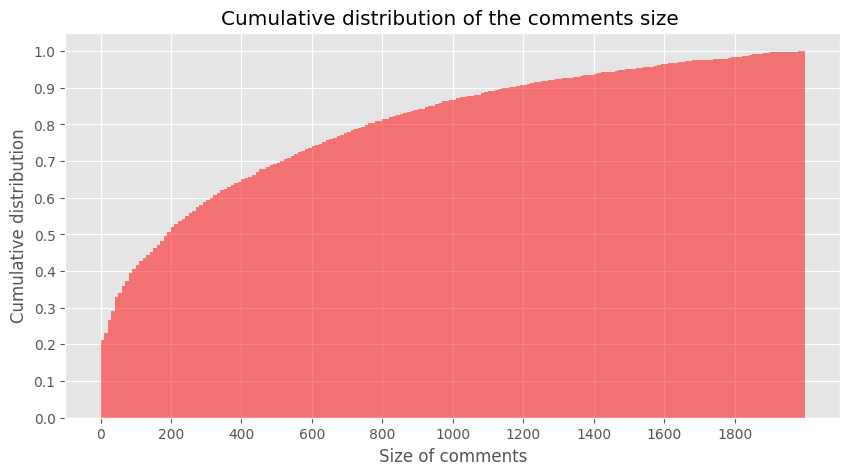

In [56]:
# plot different percentiles from 10 to 99
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.hist(ds["nl_size"], bins=200, range=(0, 2000), color="#FF0000", alpha=0.5, density=True, cumulative=True)
plt.xticks(np.arange(0, 2000, 200))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Size of comments")
plt.ylabel("Cumulative distribution")
plt.title("Cumulative distribution of the comments size ")
plt.show()

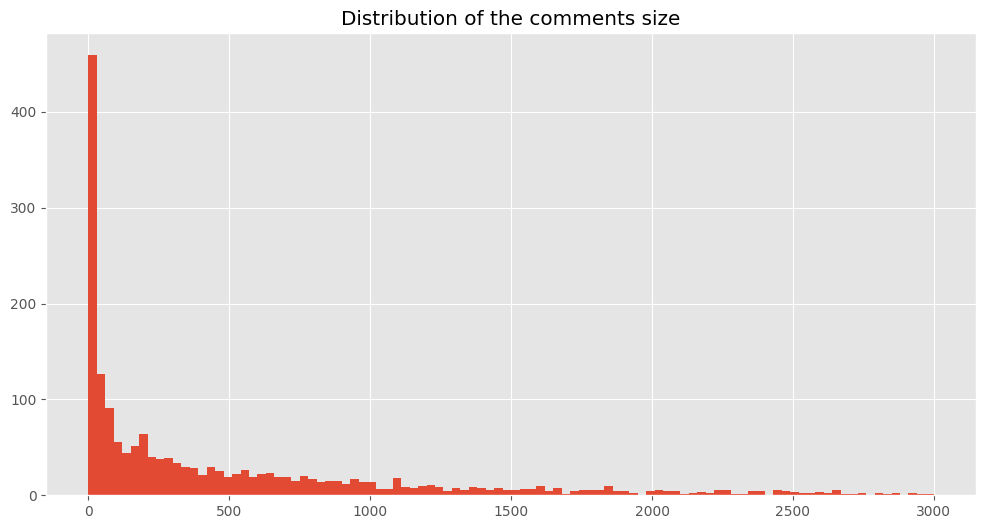

In [68]:
# plot distribution of size of nl_size column
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
# plt hist with xlimit = 20000
plt.hist(ds["nl_size"], bins=100, range=(0, 3000))
plt.title("Distribution of the comments size")
plt.show()

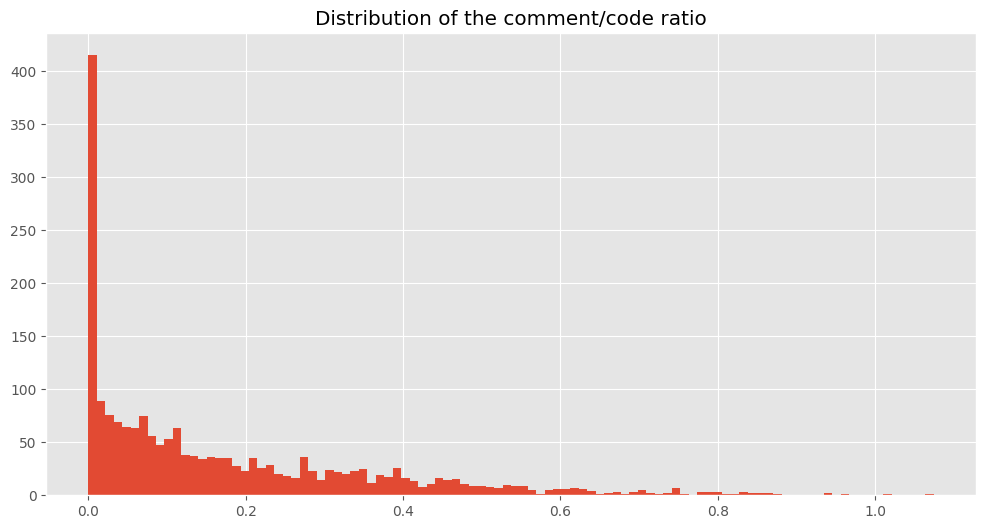

max ratio: 1.0747508305647842


In [81]:
# plot dist of comment to code ratio
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
# plt hist with xlimit = 20000
plt.hist(ds["nl_ratio"], bins=100)
plt.title("Distribution of the comment/code ratio")
plt.show()
print(f"max ratio: {np.max(ds['nl_ratio'])}")

In [57]:
nl_size_total= np.sum(ds["nl_size"])
# number of files with comment size between 0 and 10
ds_no_comment = ds.filter(lambda x: x["nl_size"] < 10)
print(f"Number of files with almost no comment: {len(ds_no_comment)}, it makes {len(ds_no_comment)*100/len(ds):.2f}% of the dataset")

Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--the-stack-smol-7b51f8bde3058781/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-ab14351189491a5e.arrow


Number of files with almost no comment: 363, it makes 18.15% of the dataset


Let's analyze some files with almost no comments

In [82]:
ds_no_comment

Dataset({
    features: ['content', 'avg_line_length', 'max_line_length', 'alphanum_fraction', 'licenses', 'repository_name', 'path', 'size', 'lang', 'nl_text', 'nl_size'],
    num_rows: 363
})

In [97]:
def is_autogenerated(example, scan_width=5):
    """Check if file is autogenerated by looking for keywords in the first few lines of the file."""
    keywords = ["auto-generated", "autogenerated", "automatically generated"]
    lines = example["content"].splitlines()
    for _, line in zip(range(scan_width), lines):
        for keyword in keywords:
            if keyword in line.lower():
                return {"autogenerated": True}
    else:
        return {"autogenerated": False}

def has_few_assignments(example, minimum=4):
    """Check if file uses symbol '=' less than `minimum` times."""
    lines = example["content"].splitlines()
    counter = 0
    for line in lines:
        counter += line.lower().count("=")
        if counter > minimum:
            return {"has_few_assignments": False}
    return {"has_few_assignments": True}

def has_no_keywords(example):
    """Check if a python file has none of the keywords for: funcion, class, for loop, while loop."""
    keywords = ["def ", "class ", "for ", "while "]
    lines = example["content"].splitlines()
    for line in lines:
        for keyword in keywords:
            if keyword in line.lower():
                return {"has_no_keywords": False}
    return {"has_no_keywords": True}

def apha_stats(example):
    if example["max_line_length"] > 1000 or example["avg_line_length"] > 100 or example["alphanum_fraction"] < 0.25:
        return True
    return False

def is_config_or_test(example, scan_width=5, coeff=0.05):
    """Check if file is a configuration file or a unit test by :
    1- looking for keywords in the first few lines of the file.
    2- counting number of occurence of the words 'config' and 'test' with respect to number of lines.
    """

    keywords = ["unit tests", "test file", "configuration file"]
    lines = example["content"].splitlines()
    count_config = 0
    count_test = 0
    # first test
    for _, line in zip(range(scan_width), lines):
        for keyword in keywords:
            if keyword in line.lower():
                return {"config_or_test": True}
    # second test
    nlines = example["content"].count("\n")
    threshold = int(coeff * nlines)
    for line in lines:
        count_config += line.lower().count("config")
        count_test += line.lower().count("test")
        if count_config > threshold or count_test > threshold:
            return {"config_or_test": True}
    return {"config_or_test": False}

In [117]:
import datasets

datasets.utils.logging.set_verbosity_error()

# count how many files in ds_no_comment are autogenerated
autogenerated = ds_no_comment.map(is_autogenerated)
print(f"Number of files with almost no comment and are *autogenerated*: {len(autogenerated.filter(lambda x: x['autogenerated']))}")

# count how many files in ds_no_comment have few assignments
few_assignments = ds_no_comment.map(has_few_assignments)
number = len(few_assignments.filter(lambda x: x['has_few_assignments']))
print(f"Number of files with almost no comment and have *few assignments*: {number} and represents {number*100/len(ds_no_comment):.2f}% of the no comment dataset")

# count how many files in ds_no_comment have no keywords
no_keywords = ds_no_comment.map(has_no_keywords)
number = len(no_keywords.filter(lambda x: x['has_no_keywords']))
print(f"Number of files with almost no comment and have *no keywords*: {number} and represents {number*100/len(ds_no_comment):.2f}% of the no comment dataset")

config_or_test = ds_no_comment.map(is_config_or_test)
number = len(config_or_test.filter(lambda x: x['config_or_test']))
print(f"Number of files with almost no comment and are *config or test*: {number} and represents {number*100/len(ds_no_comment):.2f}% of the no comment dataset")

#===========Intersection between no keywords/few assignements ============

print("\nIntersection between autogenerated/no keywords/few assignements:")
# files that are both no keywords and few assignements
no_keywords_and_few_assignments = no_keywords.filter(lambda x: x['has_no_keywords']).map(has_few_assignments)
number = len(no_keywords_and_few_assignments.filter(lambda x: x['has_few_assignments']))
print(f"Number of files with almost no comment and have no keywords and few assignments: {number} and represents {number*100/len(ds_no_comment):.2f}% of the no comment dataset")

#===========Intersection with conf and test files ============
# count how many files in ds_no_comment are config or test


print("\nIntersection with config and test files:")
# files that are both no keywords and are config or test
no_keywords_and_config_or_test = no_keywords.filter(lambda x: x['has_no_keywords']).map(is_config_or_test)
number = len(no_keywords_and_config_or_test.filter(lambda x: x['config_or_test']))
print(f"Number of files with almost no comment and have no keywords and are config or test: {number} and represents {number*100/len(ds_no_comment):.2f}% of the no comment dataset")

# files that are both few assignments and are config or test
few_assignments_and_config_or_test = few_assignments.filter(lambda x: x['has_few_assignments']).map(is_config_or_test)
number = len(few_assignments_and_config_or_test.filter(lambda x: x['config_or_test']))
print(f"Number of files with almost no comment and have few assignments and are config or test: {number} and represents {number*100/len(ds_no_comment):.2f}% of the no comment dataset")

Number of files with almost no comment and are *autogenerated*: 0
Number of files with almost no comment and have *few assignments*: 135 and represents 37.19% of the no comment dataset
Number of files with almost no comment and have *no keywords*: 87 and represents 23.97% of the no comment dataset
Number of files with almost no comment and are *config or test*: 103 and represents 28.37% of the no comment dataset

Intersection between autogenerated/no keywords/few assignements:
Number of files with almost no comment and have no keywords and few assignments: 61 and represents 16.80% of the no comment dataset

Intersection with config and test files:
Number of files with almost no comment and have no keywords and are config or test: 11 and represents 3.03% of the no comment dataset
Number of files with almost no comment and have few assignments and are config or test: 28 and represents 7.71% of the no comment dataset


In [95]:
# run statistics above on the original ds
autogenerated = ds.map(is_autogenerated)
few_assignments = ds.map(has_few_assignments)
no_keywords = ds.map(has_no_keywords)
no_keywords_and_few_assignments = no_keywords.filter(lambda x: x['has_no_keywords']).map(has_few_assignments)

# count how many files in ds are autogenerated
print(f"Number of files with are autogenerated: {len(autogenerated.filter(lambda x: x['autogenerated']))}")

# count how many files in ds have few assignments
number = len(few_assignments.filter(lambda x: x['has_few_assignments']))
print(f"Number of files with have few assignments: {number} and represents {number*100/len(ds):.2f}% of the dataset")

# count how many files in ds have no keywords
number = len(no_keywords.filter(lambda x: x['has_no_keywords']))
print(f"Number of files with have no keywords: {number} and represents {number*100/len(ds):.2f}% of the dataset")

# files that are both no keywords and few assignements
number = len(no_keywords_and_few_assignments.filter(lambda x: x['has_few_assignments']))
print(f"Number of files with have no keywords and few assignments: {number} and represents {number*100/len(ds):.2f}% of the dataset")

Number of files with are autogenerated: 9
Number of files with have few assignments: 329 and represents 16.45% of the dataset
Number of files with have no keywords: 179 and represents 8.95% of the dataset
Number of files with have no keywords and few assignments: 108 and represents 5.40% of the dataset


### Java

In [136]:
import pygments

def comment_size(text, language="java"):
    """
    Calculuate the ratio of comments to code in a JavaScript program.
    """
    lexer = pygments.lexers.get_lexer_by_name(language)
    tokens = pygments.lex(text, lexer)
    comment_len = 0
    for token_type, token in tokens:
        if token_type == pygments.token.Comment.Multiline or token_type == pygments.token.Comment.Single:
            comment_len += len(token) # token is a string with the comment contents
    return comment_len

In [131]:
example = """
#general comment
class foo():
    '''
    class docstring
    '''
    
    some_value = 2
    def bar(arg1, arg2):
        ''' function docstring'''
        if arg1 == 2:
            # first comment
            print(arg1)
        else:
            # second comment
            arg2 += 3
        return arg1 + arg2
"""

comment_size(example, language="python")

token #general comment
token # first comment
token # second comment


47

In [144]:
# define the function to add a comments column to the dataset
COLUMN = "content"

def extract_nl_text_j(examples, language="java"):
    size_list = []
    ratio_list = []
    for code in examples[COLUMN]:
        size = comment_size(code, language=language)
        size_list.append(size)
        ratio_list.append(size/len(code))
    return {"nl_size": size_list, "nl_ratio": ratio_list}

In [138]:
import numpy as np

ds = ds_java.select(range(2000))
ds = ds.map(extract_nl_text_j, batched=True, batch_size=100)

ratio = np.sum(ds["nl_size"])*100 / np.sum([len(code) for code in ds["content"]])
print(f"Comment to code ratio of the dataset: {ratio:.2f}%")

# get mean median and percentiles of nl_size
print(f"Mean comment size: {np.mean(ds['nl_size']):.2f}")
print(f"Median comment size: {np.median(ds['nl_size']):.2f}")
print(f"Percentiles of comments size 20th, 80th, 95th and 99th: {np.percentile(ds['nl_size'], [20, 80, 95, 99])}")

  0%|          | 0/20 [00:00<?, ?ba/s]

Comment to code ratio of the dataset: 23.02%
Mean comment size: 1535.23
Median comment size: 507.00
Percentiles of comments size 20th, 80th, 95th and 99th: [    0.    1382.    4898.55 17759.08]


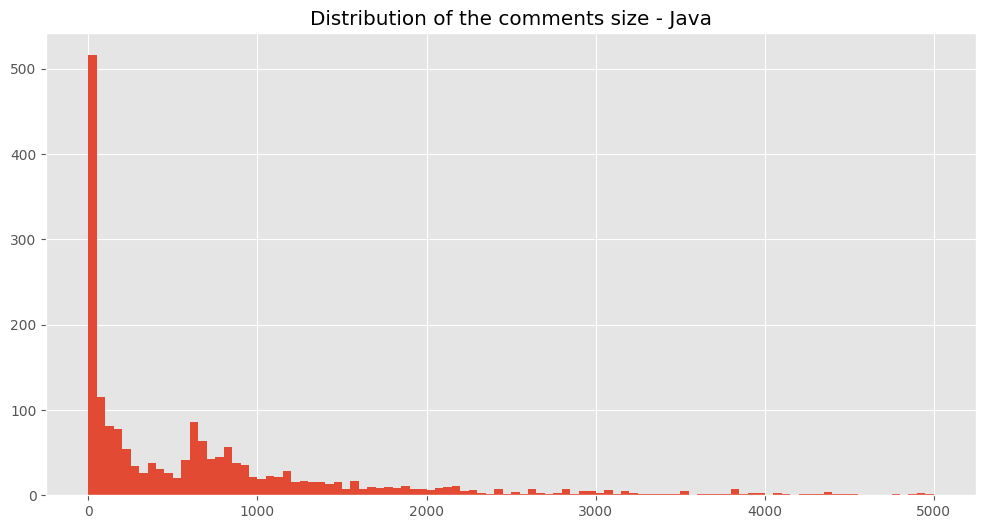

In [140]:
# plot distribution of size of nl_size column
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
# plt hist with xlimit = 20000
plt.hist(ds["nl_size"], bins=100, range=(0, 5000))
plt.title("Distribution of the comments size - Java")
plt.show()

In [141]:
nl_size_total= np.sum(ds["nl_size"])
# number of files with comment size between 0 and 10
ds_no_comment = ds.filter(lambda x: x["nl_size"] < 10)
print(f"Number of files with almost no comment: {len(ds_no_comment)}, it makes {len(ds_no_comment)*100/len(ds):.2f}% of the dataset")

  0%|          | 0/2 [00:00<?, ?ba/s]

Number of files with almost no comment: 408, it makes 20.40% of the dataset


### Javascript

In [145]:
import numpy as np
from functools import partial

    
ds =ds_js.select(range(2000))
ds = ds.map(partial(extract_nl_text_j, language="javascript"), batched=True, batch_size=100)

  0%|          | 0/20 [00:00<?, ?ba/s]

In [ ]:

ratio = np.sum(ds["nl_size"])*100 / np.sum([len(code) for code in ds["content"]])
print(f"Comment to code ratio of the dataset: {ratio:.2f}%")

# get mean median and percentiles of nl_size
print(f"Mean comment size: {np.mean(ds['nl_size']):.2f}")
print(f"Median comment size: {np.median(ds['nl_size']):.2f}")
print(f"Percentiles of comments size 20th, 80th, 95th and 99th: {np.percentile(ds['nl_size'], [20, 80, 95, 99])}")